# Can you survive the Titanic?

Anne Le

**Data description link from**
[kaggle](https://www.kaggle.com/c/titanic/data)

![Radio Message from the history.com site](http://cdn.history.com/sites/2/2014/01/sos-message-titanic-P.jpeg)

### Data information

**Variable Descriptions**||
:---|---|
survival|        Survival (0 = No; 1 = Yes)
pclass|          Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name|            Name
sex|             Sex
age|             Age
sibsp|           Number of Siblings/Spouses Aboard
parch|           Number of Parents/Children Aboard
ticket|          Ticket Number
fare|            Passenger Fare
cabin|           Cabin
embarked|        Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

## Setting variables and import libraries ##

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set parameters for seaborn plots
sns.set(context='notebook', 
        style='whitegrid',
        palette='Accent',
        font_scale=1.3)

# plotting display inside of notebook
%matplotlib inline

# setting default figure size
plt.rcParams['figure.figsize'] = (14,8)

## Data Investigation ##

#### Reading csv file into pandas DataFrame

Set index to PassengerID

In [2]:
titanicDF = pd.read_csv('/home/jns/notebooks/p2/titanic_data', index_col='PassengerId')
titanicDF.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Checking dimension and size of data

In [3]:
titanicDF.shape

(891, 11)

This data set has 891 rows and 11 descriptions about the passengers with PassengerId as an index column.

#### Checking the data type for each column

In [4]:
titanicDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 66.1+ KB


The DataFrame is showing 6 continous variables and 5 categorical variables.

Note that **Age, Cabin, **and** Embarked** has missing values. 

## Some basic statistics about the data

In [5]:
# Ignore RuntimeWarning: Invalid value encountered in percentile

import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

titanicDF.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The describe function calculates some statistics for continuous variables. To look at the nominal variables, we can create a new varibale for these values and use the describe function on this variable.

In [6]:
# use a double bracket to select the specified columns into a new DataFrame
nominal = titanicDF[['Name', 'Cabin', 'Embarked']]

In [7]:
nominal.describe()

,Name,Cabin,Embarked
count,891,204,889
unique,891,147,3
top,"Herman, Mrs. Samuel (Jane Laver)",B96 B98,S
freq,1,4,644


The results show 891 unique name with each name occuring once. There are 204 cabins, 147 unique with a frequency of 4. Lastly, there are 889 that embared from 3 different locations up to 644 occurances.

# What factors made people more likely to survive?

When the R.M.S Titanic sank in 1912 after colliding into an iceberg, it had 2,224 passengers and crew aboard. More than 1,500 died. The protocol to load lifeboats were "women and children first". This resulted in many partially loaded lifeboats with many men left on board.  

Is this really the case? Before we make a conclusions, let's explore some characteristics that made people more likely to survive.

## First, how many people survived this crash?

We can use the value_counts function to give us the unique values from the survived column.

In [8]:
survived = titanicDF['Survived'].value_counts()

print ("%s passengers died and %s passengers survived." %(survived[0], survived[1]))

549 passengers died and 342 passengers survived.


What's the survival ratio?

In [9]:
survivedRatio = round((survived/survived.sum())*100,2)
print ('This is equivalent to %s percent of the passenger died and %s percent of the passenger survived.' 
       %(survivedRatio[0], survivedRatio[1]))

This is equivalent to 61.62 percent of the passenger died and 38.38 percent of the passenger survived.


### Let's use a count plot to view categorical data

[[<matplotlib.text.Text at 0x6a241e90>, <matplotlib.text.Text at 0x6a2475b0>],

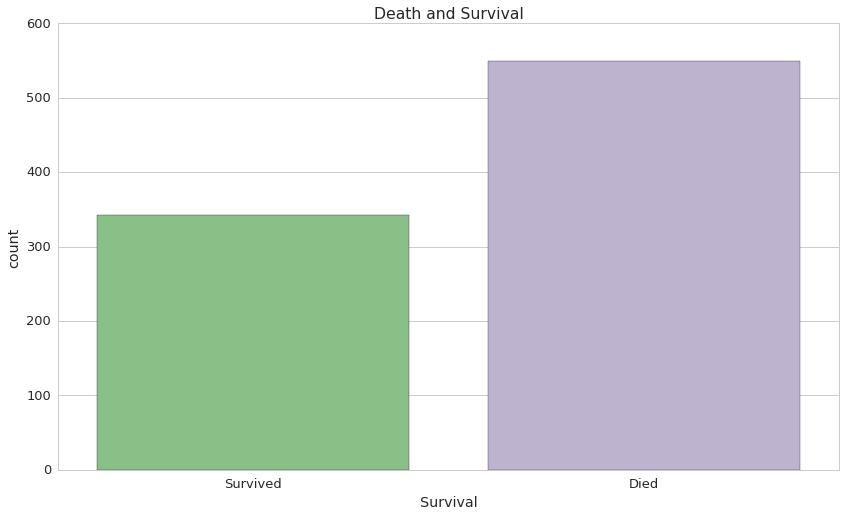

In [10]:
s = sns.countplot(x = 'Survived', data = titanicDF, order=(1,0))
s.set(xticklabels = ['Survived', 'Died'],
     title = 'Death and Survival',
     xlabel = 'Survival')

#### Here is another look at the survival statistics

Use unstack function to pivot the data into survival's hierarchical level.

In [11]:
titanicDF.groupby('Survived').describe().unstack(level=0)

Age                    Fare                   Parch  \
Survived           0           1           0           1           0   
count     424.000000  290.000000  549.000000  342.000000  549.000000   
mean       30.626179   28.343690   22.117887   48.395408    0.329690   
std        14.172110   14.950952   31.388207   66.596998    0.823166   
min         1.000000    0.420000    0.000000    0.000000    0.000000   
25%              NaN         NaN    7.854200   12.475000    0.000000   
50%              NaN         NaN   10.500000   26.000000    0.000000   
75%              NaN         NaN   26.000000   57.000000    0.000000   
max        74.000000   80.000000  263.000000  512.329200    6.000000   

                          Pclass                   SibSp              
Survived           1           0           1           0           1  
count     342.000000  549.000000  342.000000  549.000000  342.000000  
mean        0.464912    2.531876    1.950292    0.553734    0.473684  
std         0.771712    0.735805    0.863321    1.288399    0.708688  
min         0.000000    1.000000    1.000000    0.000000    0.000000  
25%         0.000000    2.000000    1.000000    0.000000    0.000000  
50%         0.000000    3.000000    2.000000    0.000000    0.000000  
75%         1.000000    3.000000    3.000000    1.000000    1.000000  
max         5.000000    3.000000    3.000000    8.000000    4.000000

## What's the distribution of the passenger age range?

In [12]:
print('The youngest passenger is: ', titanicDF['Age'].min())
print('The oldest passenger is: ', titanicDF['Age'].max())

The youngest passenger is:  0.42
The oldest passenger is:  80.0


Recall that there are missing values for passenger's age. We can use isnull to check for missing items then sum up the number of missing items.

In [13]:
missingAge = titanicDF['Age'].isnull().sum()
print ('%s items are missing from the age column' %missingAge)

177 items are missing from the age column


This is almost 20% of the data. Since we don't know how old these passengers are for sure, we can try filling the missing age with the passenger's meadian age to help us visualize this distribution.

#### From pandas, use fillna to replace the missing items with the meadian age and create a new column in the DataFrame.

In [14]:
titanicDF['NewAge'] = titanicDF['Age'].fillna(titanicDF['Age'].median())

#### Plot the age distribution

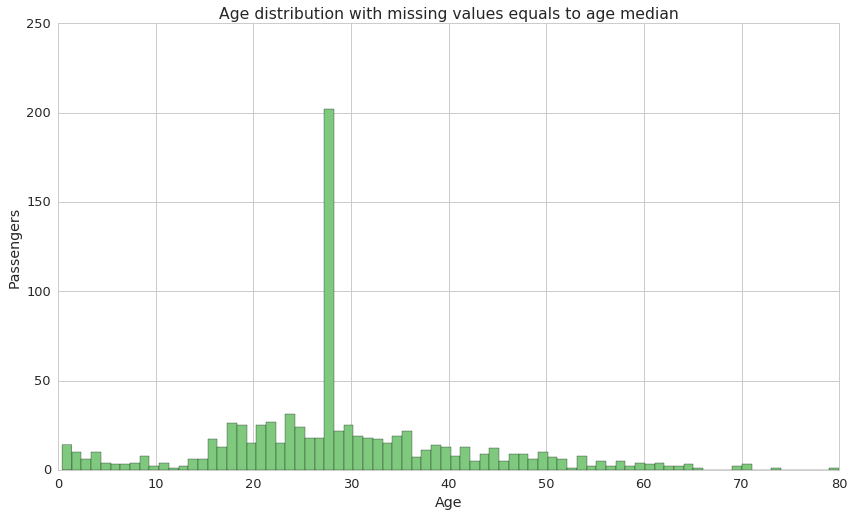

In [15]:
newAgeDist = titanicDF['NewAge'].hist(bins=80)
plt.title('Age distribution with missing values equals to age median')
plt.xlabel('Age')
plt.ylabel('Passengers')

As you can see, there's a spike in the histogram by replacing the missing passenger age with the median age. Although we can still see that most of this distribution fall around 20 to 30 years of age, it doesn't give us the right representation of the age range.

#### We can use matplotlib to look at the initial passenger's age distribution where we ignore the missing age items.

In [16]:
titanicDF['ageDropna'] = titanicDF['Age'].dropna()

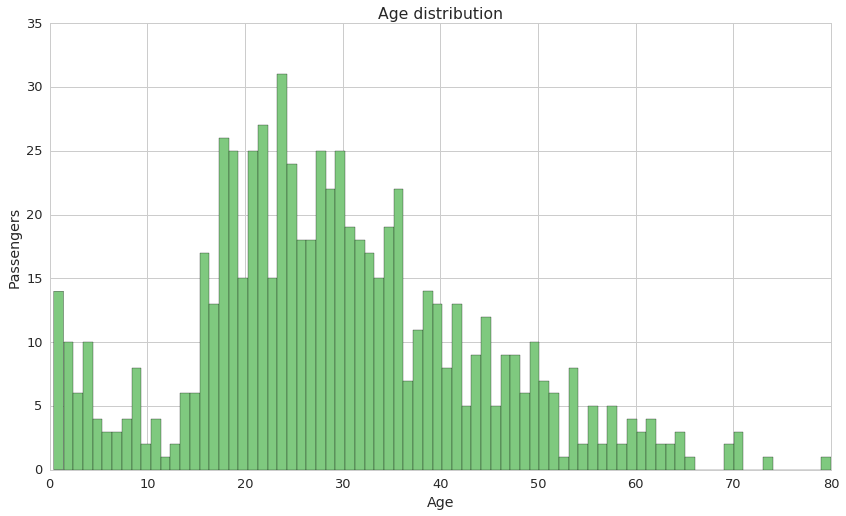

In [17]:
titanicDF['ageDropna'].hist(bins=80)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Passengers')

Since this is a large data set, we can still observe the distribution when omitting the missing values.

#### Create a new variable to get a count of survived according to age.

In [18]:
ageSurvived = titanicDF.groupby(['Age']).Survived.value_counts().unstack(level=1).dropna()
ageSurvived.head()

Survived,0,1
Age,,
1.0,2.0,5.0
2.0,7.0,3.0
3.0,1.0,5.0
4.0,3.0,7.0
6.0,1.0,2.0


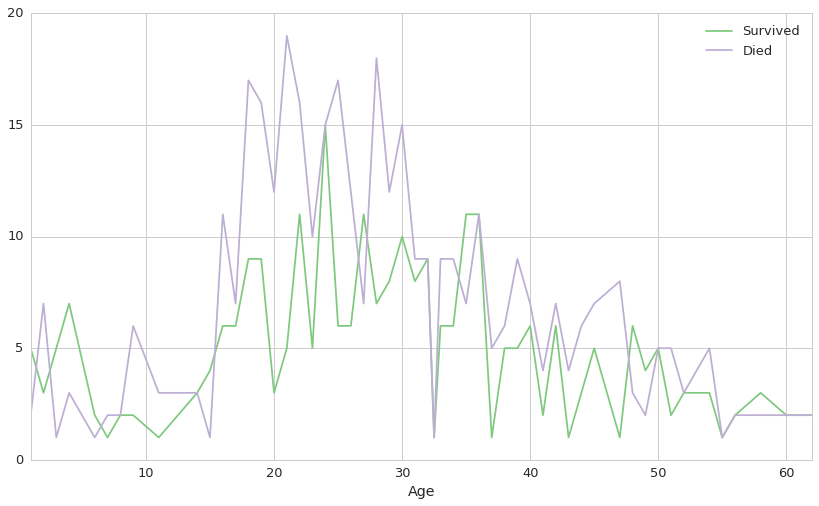

In [19]:
ageSurvived[1].plot()
ageSurvived[0].plot()
plt.legend(['Survived','Died'])

Another view at the age distribution by death and survival.

## How many men and women survived?

Count all unique values of males and females.

In [20]:
genderCount = titanicDF['Sex'].value_counts()
genderCount/genderCount.sum()

male      0.647587
female    0.352413
Name: Sex, dtype: float64

Use groupby to aggregate the number of survived by sex and divide by gender.

In [21]:
genderSurvived = (titanicDF.groupby(['Sex']).Survived.sum())
genderRatio = round((genderSurvived/genderCount)*100,2)

In [22]:
print ('Out of %s men on board, %s of them survived. Out of %s women on board, %s of them survived.' 
       %(genderCount[0],genderSurvived[1], genderCount[1], genderSurvived[0]))
print ('This ratio is %s percent for men and %s percent is for women.'%(genderRatio[1], genderRatio[0]))

Out of 577 men on board, 109 of them survived. Out of 314 women on board, 233 of them survived.
This ratio is 18.89 percent for men and 74.2 percent is for women.


### Let's take a look at this distribution with a violin plot.

The violin plot shows the distribution of quantitative data across several levels of categorical variables. This will allow us to compare the different distributions at the same time.

 [<matplotlib.text.Text at 0x69a9dcb0>, <matplotlib.text.Text at 0x69aa6190>],

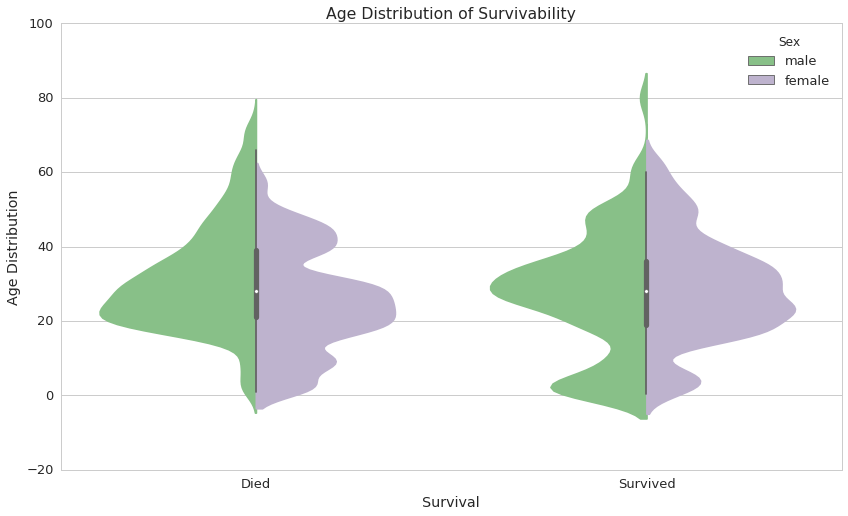

In [23]:
a = sns.violinplot(data=titanicDF, 
                   x='Survived', y='Age', 
                   hue='Sex', split=True, 
                   bw=.2)

a.set(xlabel = 'Survival',
      ylabel = 'Age Distribution',
      xticklabels = ['Died', 'Survived'],
      title = 'Age Distribution of Survivability')

From this plot, we can see a large portion of males and females in their late 20s to early 30s died. One 80 year old passenger survived while most senior passenger died. Also more male children survived than died.

## Do women and children have a better chance to survive?

From the observations above, women and children does seem to have an advantage over men. I will be using a chi square test to test the relationship between sex, age, and survival. Since we are testing the difference between sex (male, female and children) we need to develop a contingency table before performing the because these individuals are the marginal total of all the passengers on the Titanic. According to the Central Limit Thereom, we can assume that this is a random sample.

** Variables**||
---|---|
Independent|Dependent
Sex|Survival
Age|

#### Hypothesis:

Ho: The relationship between women, children and survival is not statistically significant when alpha = .05.

Ha: The relationship between women, children and survival is statistically significant when alpha = .05.

#### Create a new column for women and children with the value 1 indicating true and 0 as false.

In [24]:
titanicDF['WomChild'] = np.where((titanicDF['Age'] == 12) | (titanicDF['Sex'] == 'female'),1,0)

In [25]:
womChild = titanicDF['WomChild'].value_counts()

#### Import the stats library to compute chi square

In [26]:
import scipy.stats as sp

#### Define a function to take two inputs and put them into a frequency (contingency) table. Use this observation table to calculate the chi square statistic and the p-value.

In [27]:
def computeChi2(p1,p2):

    obs = pd.crosstab(p1,p2)

    chi2, pval, dof, expected = sp.chi2_contingency(obs)
    
    print (obs)
    print('ChiSquare test statistic: ',chi2)
    print('p-value: ',pval)
    
    return

In [28]:
computeChi2(titanicDF.WomChild,titanicDF.Survived)

Survived    0    1
WomChild          
0         468  108
1          81  234
ChiSquare test statistic:  263.213570186
p-value:  3.42019440317e-59


With the p-value close to 0, the test provided convincing evidence that age and sex is related to survivability.

## What about the different passenger classes?

Again, we can use the groupby function to get a total count of those that survived per each class.

In [29]:
pclassCount = titanicDF.groupby(['Pclass']).Survived.count()
pclass = titanicDF.groupby(['Pclass']).Survived.sum()

print ('Total count:', pclassCount) 

Total count: Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64


From the count, we can see that most of the passengers on board are in class three. A few in the class two and class one.

In [30]:
print ('Survived:', pclass)

Survived: Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


However, not many passengers in class three survived.

In [31]:
pclassRatio = round((pclass/pclassCount * 100),2)
print ('Survial ratio:', pclassRatio)

Survial ratio: Pclass
1    62.96
2    47.28
3    24.24
Name: Survived, dtype: float64


#### Let's see why with a factorplot. This plot will let us control the sex parameter for categorical data.

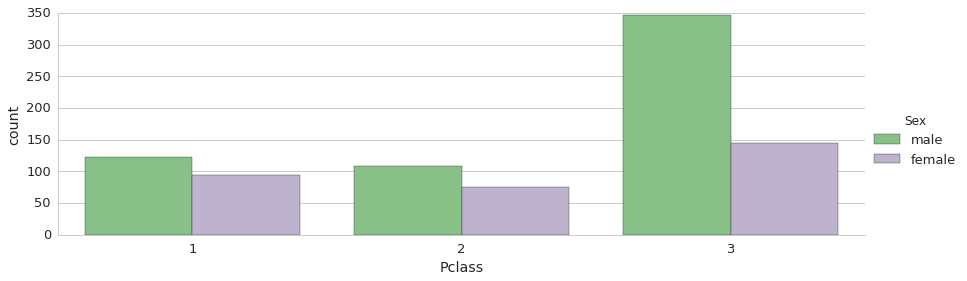

In [32]:
sns.factorplot('Pclass', data=titanicDF, kind='count', hue='Sex', aspect=3)

As expected, those in class one have a better chance to survive regardless of sex. While a large percentage of male passengers from class three died.

# Does those paying more for class one fare have a better chance to survive?

Let's test this using the same chi square test for independence.

** Variables**||
---|---|
Independent|Dependent
Passenger class|Survival
Fare|

#### Hypothesis:

Ho: The relationship between passenger class, fare and survival is not statistically significant when alpha = .05.

Ha: The relationship between passenger class, fare and survival is statistically significant when alpha = .05.


#### How much did the highest fare cost?

In [33]:
fare = titanicDF.groupby(['Pclass']).Fare.max()
fare.head()

Pclass
1    512.3292
2     73.5000
3     69.5500
Name: Fare, dtype: float64

#### What was the average fare?

In [34]:
fare = titanicDF.groupby(['Pclass']).Fare.mean()
fare.head()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

With the average fare in the first class at roughly 84 dollars and the second class's highest fare around 74 dollars, we can create a new column for first class with fare above 74 dollars or first class

#### Create a new variable to set up contingency table.

In [35]:
titanicDF['class1'] = np.where((titanicDF['Pclass'] == 1) | (titanicDF['Fare'] >= 74),1,0)

In [36]:
computeChi2(titanicDF['Survived'], titanicDF['class1'])

class1      0    1
Survived          
0         469   80
1         206  136
ChiSquare test statistic:  71.4658385462
p-value:  2.82100211671e-17


This test gives us a very low p-value, indicating that there is a relationship between first class and survivability. Thereforeo we reject the null because the p-value is statistically significant.

#### Plot this distribution with a kdeplot

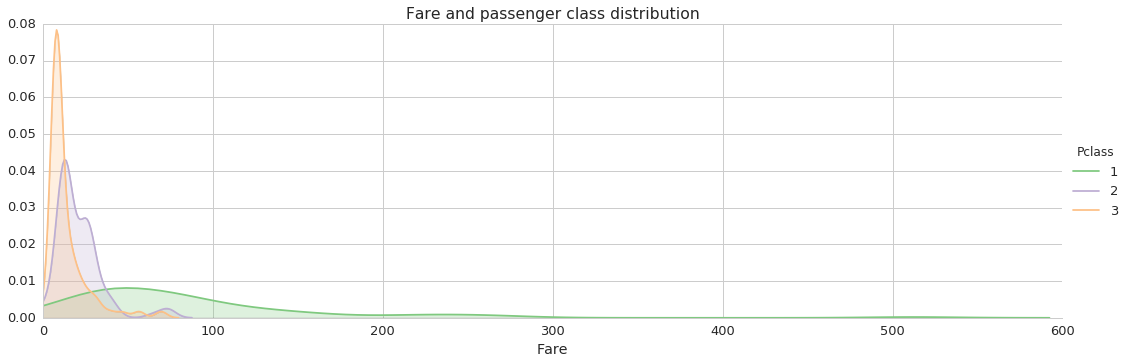

In [37]:
p = sns.FacetGrid(titanicDF, hue='Pclass', aspect=3, size=5)
p.map(sns.kdeplot,'Fare', shade='True')
p.set(title = 'Fare and passenger class distribution')
p.set(xlim=(0))
p.add_legend()

Class one is a flat distribution with the max fare in the 500s. Class three distribution is completely opposite. it peaked around 14 dollars with a small fare difference. Although class two paid a little more than class one, both classes max fare were under 100 dollars. 

# Conclusion


After exploring some features of this data set, I'm convinced that our chance to survive the Titanic is slim. Roughly about 38% of all passengers survived. Although 65% of the passengers are male, only 19% survived. From the violin plot, we saw a few of these male passengers are children. The "women and children first" protocol is also proven to be statistically significant.

However, when we looked at the distribution of ages, we found that almost 20% of our passengers had no age record. The Central Limit theorem states that it is relatively safe for us to assume that this is a normal distribution, we just can't be sure. These passengers could be in their 20s or 50s. What if they were all children below 12 years of age? If so, the result for this statistical test would no indicate such a strong relationship.

Furthermore, fare price also indicated a strong link to survivability.  The distribution above showed a reasonable fare range for class two and class three. When it comes to class one's fare, the price range is much more spread out.  It makes me wonder why some of these fares are so steep. Was there a sponsorship or was it a really special presidential suit? Becausee 500 dollars may burn a small hole in your pocket today, but in 1912, it's equivilent to 12,000 dollars! 

We've also observed that this data set post some limitations like missing cabin values. Similar to missing values in age, we don't really know which cabin these passengers reside in or if any. In future research, I would like to explore this variable. I want to know how cabin is related to passenger class and if that is related survival. Until then, your best chance to survive if you are neither a female or a child, buy class one fare before boarding the Titanic.

# Reference

### Data

[Udacity](https://classroom.udacity.com/nanodegrees/nd002/parts/0021345403/modules/317671873575461/lessons/3176718735239847/concepts/54201485780923)

[kaggle](https://www.kaggle.com/c/titanic/data)

[Radio image](http://cdn.history.com/sites/2/2014/01/sos-message-titanic-P.jpeg)

[R.M.S Titanic](https://en.wikipedia.org/wiki/RMS_Titanic)


### Statistical tests

[Testing categorical variables](http://stattrek.com/chi-square-test/goodness-of-fit.aspx?Tutorial=AP)

[Choosing specific tests](http://stats.stackexchange.com/questions/178854/a-b-tests-z-test-vs-t-test-vs-chi-square-vs-fisher-exact-test)

[Chi square contingency](https://en.wikipedia.org/wiki/Contingency_table)


### Python and Pandas

[Value counts](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html
)

[Print multiple arguments](# http://stackoverflow.com/questions/15286401/print-multiple-arguments-in-python
)

[Unstack data](http://pandas.pydata.org/pandas-docs/stable/reshaping.html)

[Finding missing values](# https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe)

[chi squared test for indepence](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)

[Seaborn plots](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.FacetGrid.html#seaborn.FacetGrid)

[Matplotlib legends](http://stackoverflow.com/questions/4805048/how-to-get-different-colored-lines-for-different-plots-in-a-single-figure)


### Other
[Inflation calculator](http://www.davemanuel.com/inflation-calculator.php)